In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from os.path import isfile, join

/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/9t/_sm_x0m957lf5z6q_l21z3dm0000gn/T/ipykernel_2268/3484662276.py:5: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get s

In [111]:
#parse through oblasts ../data/Language_data_perc/ and create one dataframe with all oblasts
mypath = "../data/UKR_ADM2_LANG_PERC/"
#delete combined.csv if exists
if os.path.exists("../data/UKR_ADM2_LANG_PERC_combined_prePro.csv"):
    os.remove("../data/UKR_ADM2_LANG_PERC_combined_prePro.csv")
extension = 'csv'
all_filenames = [f for f in os.listdir(mypath) if isfile(join(mypath, f))]
all_filenames = sorted(all_filenames, key=lambda x: int(x.split('_')[0]))
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(mypath + f, sep='\t', skiprows=5) for f in all_filenames ])
combined_csv = combined_csv.dropna()
#export to csv
combined_csv.to_csv( "../data/UKR_ADM2_LANG_PERC_combined_prePro.csv", index=False, encoding='utf-8-sig')

In [49]:
#parse through oblasts ../data/Language_data_perc/ and create one dataframe with all oblasts
mypath = "../data/UKR_ADM2_POP_TOT/"
#delete combined.csv if exists
if os.path.exists("../data/UKR_ADM2_POP_TOT_combined_prePro.csv"):
    os.remove("../data/UKR_ADM2_POP_TOT_combined_prePro.csv")
extension = 'csv'
all_filenames = [f for f in os.listdir(mypath) if isfile(join(mypath, f))]
all_filenames = sorted(all_filenames, key=lambda x: int(x.split('_')[0]))
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(mypath + f, sep='\t', skiprows=5) for f in all_filenames ])
combined_csv = combined_csv.dropna()
#export to csv
combined_csv.to_csv( "../data/UKR_ADM2_POP_TOT_combined_prePro.csv", index=False, encoding='utf-8-sig')

# Verificando Dados Vazios

In [69]:
#get shapefiles from Ukraine_oldShapeFiles
gdf_ukraine_adm_2_old = gpd.read_file('../data/Ukraine_oldShapeFiles/UKR_adm2.shp')
#change encoding to utf-8
gdf_ukraine_adm_2_old = gdf_ukraine_adm_2_old
gdf_ukraine_adm_2_old.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,240,UKR,Ukraine,1,Cherkasy,1,Cherkas'ka,UA.CK.CM,0,NaN,Mis'ka Rada,Mis'ka Rada,NaN,NaN,"POLYGON ((32.03880 49.49877, 32.05218 49.49868..."
1,240,UKR,Ukraine,1,Cherkasy,2,Cherkas'kyi,UA.CK.CR,0,NaN,Raion,District,NaN,NaN,"POLYGON ((32.19797 49.20946, 32.18890 49.20953..."
2,240,UKR,Ukraine,1,Cherkasy,3,Chornobaivs'kyi,UA.CK.CB,0,NaN,Raion,District,NaN,Chornobayivskyi,"POLYGON ((32.47975 49.30701, 32.47074 49.31886..."
3,240,UKR,Ukraine,1,Cherkasy,4,Chyhyryns'kyi,UA.CK.CY,0,NaN,Raion,District,NaN,NaN,"POLYGON ((32.87844 49.22034, 32.87827 49.20856..."
4,240,UKR,Ukraine,1,Cherkasy,5,Drabivs'kyi,UA.CK.DR,0,NaN,Raion,District,NaN,NaN,"POLYGON ((32.45570 49.93700, 32.45568 49.93112..."


In [82]:
#discard "'" character from NAME_2 column
gdf_ukraine_adm_2_old['NAME_2'] = gdf_ukraine_adm_2_old['NAME_2'].str.replace("'", "")
gdf_ukraine_adm_2_old.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,240,UKR,Ukraine,1,Cherkasy,1,cherkaska,UA.CK.CM,0,NaN,Mis'ka Rada,Mis'ka Rada,NaN,NaN,"POLYGON ((32.03880 49.49877, 32.05218 49.49868..."
1,240,UKR,Ukraine,1,Cherkasy,2,cherkaskyi,UA.CK.CR,0,NaN,Raion,District,NaN,NaN,"POLYGON ((32.19797 49.20946, 32.18890 49.20953..."
2,240,UKR,Ukraine,1,Cherkasy,3,chornobaivskyi,UA.CK.CB,0,NaN,Raion,District,NaN,Chornobayivskyi,"POLYGON ((32.47975 49.30701, 32.47074 49.31886..."
3,240,UKR,Ukraine,1,Cherkasy,4,chyhyrynskyi,UA.CK.CY,0,NaN,Raion,District,NaN,NaN,"POLYGON ((32.87844 49.22034, 32.87827 49.20856..."
4,240,UKR,Ukraine,1,Cherkasy,5,drabivskyi,UA.CK.DR,0,NaN,Raion,District,NaN,NaN,"POLYGON ((32.45570 49.93700, 32.45568 49.93112..."


In [112]:
lang_data_perc = pd.read_csv('../data/UKR_ADM2_LANG_PERC_combined_prePro.csv')
lang_data_perc

,,Ukrainian,Russian
0,SIMFEROPOL (miskrada),6.35,85.82
1,ALUSHTA (miskrada),9.67,83.68
2,m. DZHANKOI,7.6,83.14
3,YEVPATORIIA (miskrada),8.73,83.69
4,m. KERCH,5.27,91.34
...,...,...,...
709,s. KAMYSHLY,16.67,50.0
710,s. PYROHOVKA,6.34,89.43
711,s. POVOROTNE,14.22,71.55
712,s. FRONTOVE,11.95,70.68


In [113]:
# Rename column " " with Name
lang_data_perc = lang_data_perc.rename(columns={' ': 'Name'})

In [114]:
lang_combined_perc_clean = pd.read_csv('../data/lang_combined_perc_clean.csv')
lang_combined_perc_clean

,index,Name,Ukrainian,Russian,Notes
0,1,simferopolska,6.35,85.82,NaN
1,2,ALUSHTYNSKA,9.67,83.68,NaN
2,3,dzhankoiska,7.6,83.14,NaN
3,4,ievpatoriiska,8.73,83.69,NaN
4,5,kerchenska,5.27,91.34,NaN
...,...,...,...,...,...
719,720,n.a. ( 181),13.46,86.08,Olkhovatka
720,721,n.a. ( 511),52.4,44.1,Khartsyzk
721,722,n.a. ( 493),19.08,80.25,Rozsypne
722,723,n.a. ( 488),48.3,47.4,zhdanivka


In [115]:
#drop column index
lang_combined_perc_clean = lang_combined_perc_clean.drop(['index'], axis=1)
lang_combined_perc_clean

,Name,Ukrainian,Russian,Notes
0,simferopolska,6.35,85.82,NaN
1,ALUSHTYNSKA,9.67,83.68,NaN
2,dzhankoiska,7.6,83.14,NaN
3,ievpatoriiska,8.73,83.69,NaN
4,kerchenska,5.27,91.34,NaN
...,...,...,...,...
719,n.a. ( 181),13.46,86.08,Olkhovatka
720,n.a. ( 511),52.4,44.1,Khartsyzk
721,n.a. ( 493),19.08,80.25,Rozsypne
722,n.a. ( 488),48.3,47.4,zhdanivka


In [116]:
lang_combined_perc_clean["prev_name"] = lang_data_perc["Name"]
lang_combined_perc_clean

,Name,Ukrainian,Russian,Notes,prev_name
0,simferopolska,6.35,85.82,NaN,SIMFEROPOL (miskrada)
1,ALUSHTYNSKA,9.67,83.68,NaN,ALUSHTA (miskrada)
2,dzhankoiska,7.6,83.14,NaN,m. DZHANKOI
3,ievpatoriiska,8.73,83.69,NaN,YEVPATORIIA (miskrada)
4,kerchenska,5.27,91.34,NaN,m. KERCH
...,...,...,...,...,...
719,n.a. ( 181),13.46,86.08,Olkhovatka,NaN
720,n.a. ( 511),52.4,44.1,Khartsyzk,NaN
721,n.a. ( 493),19.08,80.25,Rozsypne,NaN
722,n.a. ( 488),48.3,47.4,zhdanivka,NaN


In [117]:
pop_tot_combined = pd.read_csv('../data/UKR_ADM2_POP_TOT_combined_prePro.csv')
pop_tot_combined

,,.1,Whole population
0,,SIMFEROPOL (miskrada),358108.0
1,,ALUSHTA (miskrada),52215.0
2,,ARMIANSK (miskrada),26867.0
3,,m. DZHANKOI,42861.0
4,,YEVPATORIIA (miskrada),117565.0
...,...,...,...
658,,TALALAIVSKYI RAION,16583.0
659,,CHERNIHIVSKYI RAION,61463.0
660,,SHCHORSKYI RAION,30438.0
661,,m. KYIV,2566953.0


In [118]:
# Remove column " "
pop_tot_combined = pop_tot_combined.drop([' '], axis=1)
pop_tot_combined

,.1,Whole population
0,SIMFEROPOL (miskrada),358108.0
1,ALUSHTA (miskrada),52215.0
2,ARMIANSK (miskrada),26867.0
3,m. DZHANKOI,42861.0
4,YEVPATORIIA (miskrada),117565.0
...,...,...
658,TALALAIVSKYI RAION,16583.0
659,CHERNIHIVSKYI RAION,61463.0
660,SHCHORSKYI RAION,30438.0
661,m. KYIV,2566953.0


In [119]:
# Rename column " .1" with Name
pop_tot_combined = pop_tot_combined.rename(columns={' .1': 'prev_name'})
pop_tot_combined

,prev_name,Whole population
0,SIMFEROPOL (miskrada),358108.0
1,ALUSHTA (miskrada),52215.0
2,ARMIANSK (miskrada),26867.0
3,m. DZHANKOI,42861.0
4,YEVPATORIIA (miskrada),117565.0
...,...,...
658,TALALAIVSKYI RAION,16583.0
659,CHERNIHIVSKYI RAION,61463.0
660,SHCHORSKYI RAION,30438.0
661,m. KYIV,2566953.0


In [120]:
# Merge pop_tot_combined and lang_combined_perc_clean in prev_name
pop_lang_combined = pd.merge(lang_combined_perc_clean, pop_tot_combined, on="prev_name", how="left")
pop_lang_combined

,Name,Ukrainian,Russian,Notes,prev_name,Whole population
0,simferopolska,6.35,85.82,NaN,SIMFEROPOL (miskrada),358108.0
1,ALUSHTYNSKA,9.67,83.68,NaN,ALUSHTA (miskrada),52215.0
2,dzhankoiska,7.6,83.14,NaN,m. DZHANKOI,42861.0
3,ievpatoriiska,8.73,83.69,NaN,YEVPATORIIA (miskrada),117565.0
4,kerchenska,5.27,91.34,NaN,m. KERCH,158165.0
...,...,...,...,...,...,...
753,n.a. ( 181),13.46,86.08,Olkhovatka,NaN,NaN
754,n.a. ( 511),52.4,44.1,Khartsyzk,NaN,NaN
755,n.a. ( 493),19.08,80.25,Rozsypne,NaN,NaN
756,n.a. ( 488),48.3,47.4,zhdanivka,NaN,NaN


In [121]:
# save pop_lang_combined to csv
pop_lang_combined.to_csv('../data/pop_lang_combined.csv', index=False)

In [122]:
pop_lang_combined_clean = pd.read_csv('../data/pop_lang_combined_clean.csv')

In [123]:
pop_lang_combined_clean = pop_lang_combined_clean.drop(['Notes'], axis=1)
pop_lang_combined_clean = pop_lang_combined_clean.dropna()

In [128]:
#join gdf_ukraine_adm_2_old and combined_csv case insensitive
gdf_ukraine_adm_2_old['NAME_2'] = gdf_ukraine_adm_2_old['NAME_2'].str.lower()
pop_lang_combined_clean['Name'] = pop_lang_combined_clean['Name'].str.lower()
gdf_ukraine_adm_2_lang_perc = gdf_ukraine_adm_2_old.merge(pop_lang_combined_clean, left_on='NAME_2', right_on='Name', how='left')
gdf_ukraine_adm_2_lang_perc.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,Name,Ukrainian,Russian,prev_name,Whole population
0,240,UKR,Ukraine,1,Cherkasy,1,cherkaska,UA.CK.CM,0,NaN,Mis'ka Rada,Mis'ka Rada,NaN,NaN,"POLYGON ((32.03880 49.49877, 32.05218 49.49868...",cherkaska,79.07,18.67,CHERKASY (miskrada),293556.0
1,240,UKR,Ukraine,1,Cherkasy,2,cherkaskyi,UA.CK.CR,0,NaN,Raion,District,NaN,NaN,"POLYGON ((32.19797 49.20946, 32.18890 49.20953...",cherkaskyi,96.84,2.91,CHERKASKYI RAION,78346.0
2,240,UKR,Ukraine,1,Cherkasy,3,chornobaivskyi,UA.CK.CB,0,NaN,Raion,District,NaN,Chornobayivskyi,"POLYGON ((32.47975 49.30701, 32.47074 49.31886...",chornobaivskyi,97.29,2.27,CHORNOBAIVSKYI RAION,49741.0
3,240,UKR,Ukraine,1,Cherkasy,4,chyhyrynskyi,UA.CK.CY,0,NaN,Raion,District,NaN,NaN,"POLYGON ((32.87844 49.22034, 32.87827 49.20856...",chyhyrynskyi,95.46,3.63,CHYHYRYNSKYI RAION,36111.0
4,240,UKR,Ukraine,1,Cherkasy,5,drabivskyi,UA.CK.DR,0,NaN,Raion,District,NaN,NaN,"POLYGON ((32.45570 49.93700, 32.45568 49.93112...",drabivskyi,98.01,1.56,DRABIVSKYI RAION,42818.0


In [129]:
#list all Nan values in column Name
sorted(gdf_ukraine_adm_2_lang_perc[gdf_ukraine_adm_2_lang_perc['Name'].isna()]['NAME_2'].unique())

['kharkivska',
 'krasnolymanska',
 'n.a. ( 180)',
 'n.a. ( 181)',
 'n.a. ( 182)',
 'n.a. ( 319)',
 'n.a. ( 384)',
 'n.a. ( 394)',
 'n.a. ( 488)',
 'n.a. ( 493)',
 'n.a. ( 511)',
 'romanivskyi',
 'selydovska',
 'slovianska']

In [95]:
#check which names in df_language_perc are not in gdf_ukraine_adm_2_old
check_names = sorted(pop_lang_combined[~pop_lang_combined['Name'].isin(gdf_ukraine_adm_2_lang_perc['NAME_2'])]['Name'].unique())
print(check_names)

['armiansk', 'avdiivka', 'berehove', 'berezan', 'bolekhiv', 'boryslav', 'boryspil', 'chernivtsi', 'debaltseve', 'dokuchaivsk', 'druzhkivka', 'dymytrov', 'haisynskyi', 'hertsaivskyi', 'hlukhiv', 'illichivsk', 'izmail', 'kakhovka', 'kalush', 'khust', 'kirovohrad', 'kirovske', 'kolomatskyi', 'kolomyia', 'koziatyn', 'krasnoperekopsk', 'krasnyilyman', 'kuznetsovsk', 'kyiv', 'lebedyn', 'liubotyn', 'mykolaivskyi', 'myrhorod', 'netishyn', 'novodnistrovsk', 'ochakiv', 'oleksandriia', 'ostroh', 'pershotravensk', 'pervomaisk', 'rzhyshchiv', 'sevastopol', 'slavuta', 'slavutych', 'smila', 'starokostiantyniv', 'svitlovodsk', 'teplodar', 'ternivka', 'truskavets', 'vasylkiv', 'vatutine', 'vilnohirsk', 'yuzhne', 'yuzhnoukrainsk', 'znamianka', 'zolotonosha']


['armiansk', 'avdiivka', 'berehove', 'berezan', 'bolekhiv', 'boryslav', 'boryspil', 'chernivtsi', 'debaltseve', 'dokuchaivsk', 'druzhkivka', 'dymytrov', 'haisynskyi', 'hertsaivskyi', 'hlukhiv', 'illichivsk', 'izmail', 'kakhovka', 'kalush', 'khust', 'kirovohrad', 'kirovske', 'kolomatskyi', 'kolomyia', 'koziatyn', 'krasnoperekopsk', 'krasnyilyman', 'kuznetsovsk', 'kyiv', 'lebedyn', 'liubotyn', 'mykolaivskyi', 'myrhorod', 'netishyn', 'novodnistrovsk', 'ochakiv', 'oleksandriia', 'ostroh', 'pershotravensk', 'pervomaisk', 'rzhyshchiv', 'sevastopol', 'slavuta', 'slavutych', 'smila', 'starokostiantyniv', 'svitlovodsk', 'teplodar', 'ternivka', 'truskavets', 'vasylkiv', 'vatutine', 'vilnohirsk', 'yuzhne', 'yuzhnoukrainsk', 'znamianka', 'zolotonosha']

<Axes: >

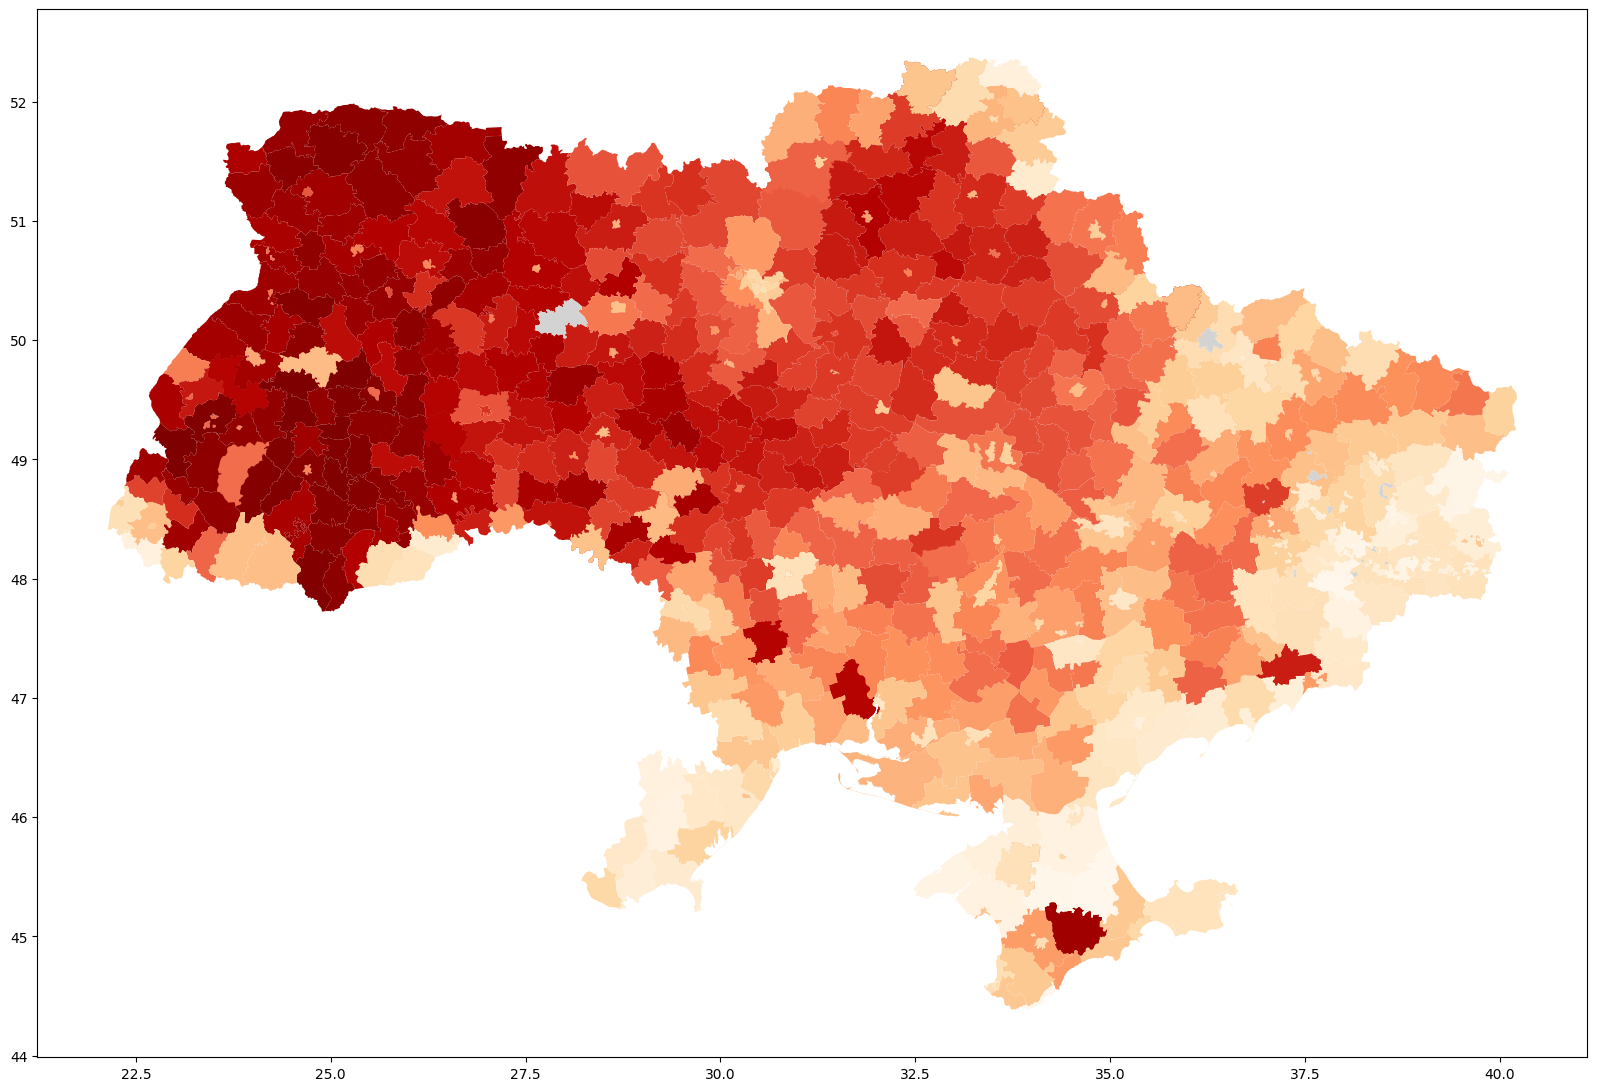

In [126]:
#plot language data not nan values
fig, ax = plt.subplots(figsize=(20, 20))
gdf_ukraine_adm_2_lang_perc.plot(ax=ax, column='Ukrainian', cmap='OrRd', missing_kwds={'color': 'lightgrey'})

In [127]:
# remove geometry column
gdf_ukraine_adm_2_lang_perc.drop(['geometry'], axis=1).to_csv('../data/gdf_ukraine_adm_2_lang_perc.csv', index=False)
